In [16]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters
import numpy as np


from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


max_words = 1000
maxlen = 500
emb_dim = 32

In [17]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = max_words)

In [18]:
# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train, 
    test_size = 0.2,
    stratify = y_train,
    random_state = 34
)

In [19]:
# 패딩 
train_seq = pad_sequences(x_train, maxlen = maxlen)
val_seq = pad_sequences(x_val, maxlen = maxlen)

In [20]:
# 원핫인코딩
# train_oh= keras.utils.to_categorical(train_seq)
# val_oh= keras.utils.to_categorical(val_seq)
# 너무 커서 변환 실패

In [21]:
train_seq.shape

(7185, 500)

In [22]:
# model = keras.Sequential([
#     keras.layers.Embedding(max_words, 128, input_length=maxlen),
#     keras.layers.Conv1D(64, 3, activation='relu', padding="valid"), # 64: 필터의 개수, 5: kernel_size
#     keras.layers.Conv1D(128, 4, activation='relu', padding="valid"), # 64: 필터의 개수, 5: kernel_size
#     keras.layers.GlobalMaxPool1D(),
    
#     keras.layers.Dropout(0.3),
#     keras.layers.Dense(96, activation='relu'),
#     keras.layers.Dense(46, activation='softmax')
# ])

In [23]:
# model = keras.Sequential()

# model.add(keras.Input(shape = (maxlen,)))
# model.add(keras.layers.Embedding(max_words, 128))
# model.add(keras.layers.Conv1D(64, 7, activation='relu')) ## 32 feature 특성공간으로 추출하며, window = 7 사용한다.
# model.add(keras.layers.Conv1D(128, 7, activation='relu'))

# model.add(keras.layers.GlobalMaxPooling1D())
# model.add(keras.layers.Dense(96, activation='relu'))
# model.add(keras.layers.Dense(46, activation='softmax'))

### 속도는 느리지만 val_loss 첫번째 시도 loss 가 제일 작게 나온 코드

In [24]:
# model = keras.Sequential()

# model.add(keras.Input(shape = (maxlen,)))
# model.add(keras.layers.Embedding(max_words, emb_dim))

# model.add(keras.layers.Conv1D(512, 64, activation='relu', padding= "same"))
# model.add(keras.layers.Dense(128))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.Conv1D(512, 64, activation='relu', padding= "same"))
# model.add(keras.layers.Dense(64))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.GlobalMaxPooling1D())

# model.add(keras.layers.Dense(460, activation='relu'))
# model.add(keras.layers.Dropout(0.4)) 

# model.add(keras.layers.Dense(92, activation='relu'))
# model.add(keras.layers.Dropout(0.4)) 

# model.add(keras.layers.Dense(46, activation='softmax'))

In [ ]:
model = keras.Sequential()

model.add(keras.Input(shape = (maxlen,)))
model.add(keras.layers.Embedding(max_words, emb_dim))

model.add(keras.layers.Conv1D(64, 7, activation='relu', padding= "valid", strides=2, input_shape=[None, 1]))
model.add(keras.layers.GRU(20, return_sequences=True, dropout=0.3, return_sequences=True)

model.add(keras.layers.Dense(46, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 32)             │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 500, 512)            │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 500, 128)            │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 500, 512)            │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500, 64)             │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 500, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,377,390 (20.51 MB)

 Trainable params: 5,377,390 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer= "adam", 
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

es_cb = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor='val_loss')

history = model.fit(
    train_seq, 
    y_train, 
    epochs = 300,
    batch_size = 32, 
    validation_data = (val_seq, y_val), 
    callbacks = [es_cb]
)

Epoch 1/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.5712 - loss: 1.7590 - val_accuracy: 0.6439 - val_loss: 1.4941
Epoch 2/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.7120 - loss: 1.1934 - val_accuracy: 0.7257 - val_loss: 1.1696
Epoch 3/300
  6/225 ━━━━━━━━━━━━━━━━━━━━ 4:53 1s/step - accuracy: 0.7707 - loss: 1.3123

In [ ]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

In [ ]:
test_seq = pad_sequences( x_test, maxlen = maxlen )
model.evaluate(test_seq, y_test)

# 2차 필터 64 로 하고 바로~~
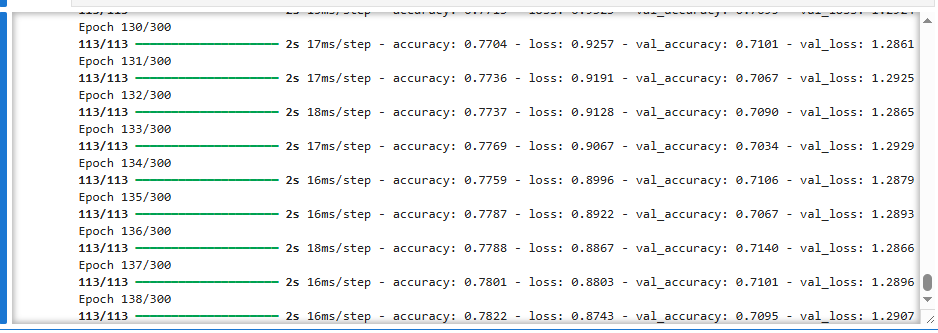

# 3차 optimizer 아담

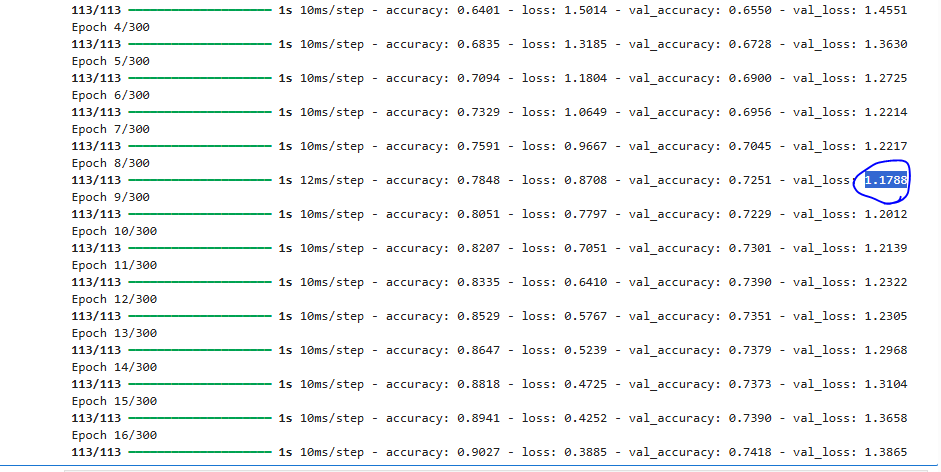

# 4차 필터 2개

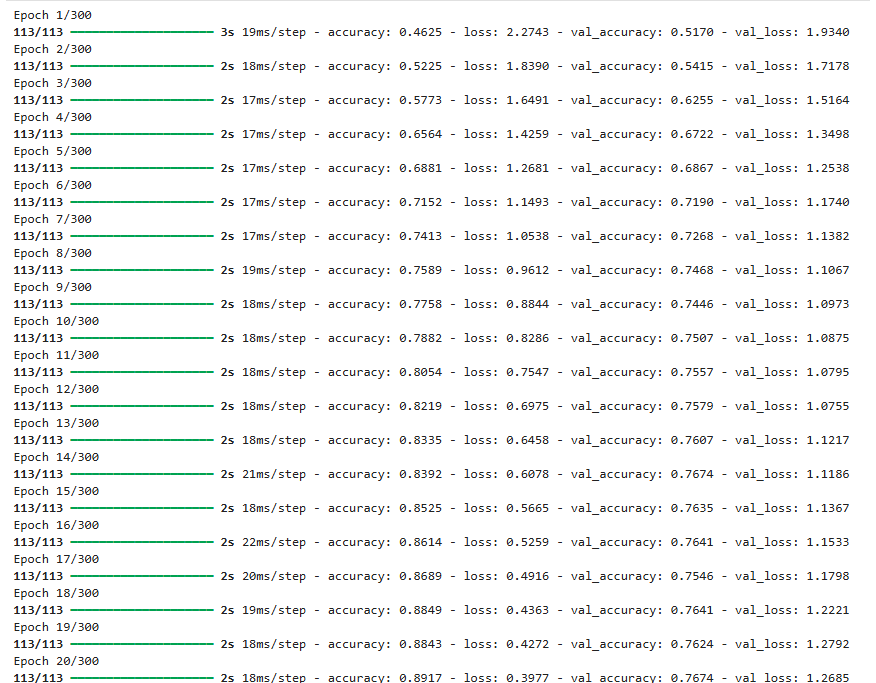

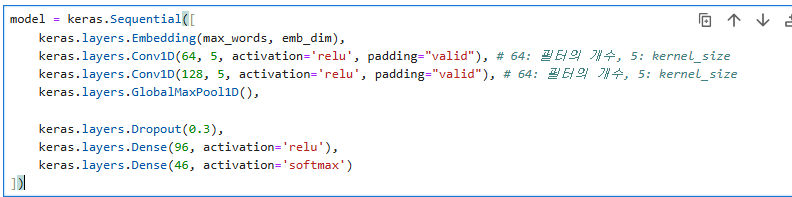

# 6차

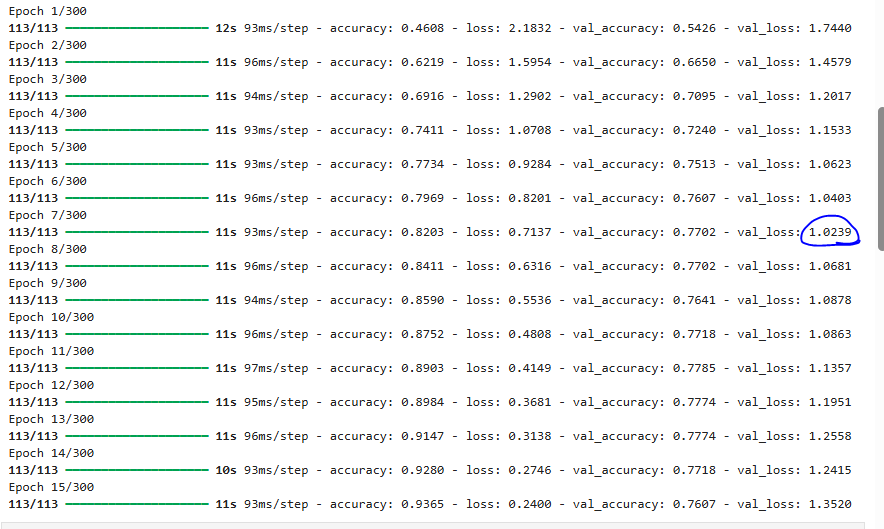

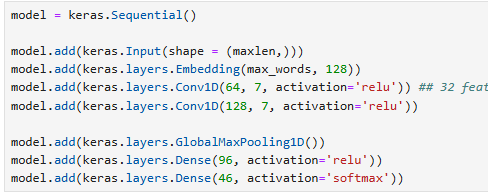

# 오이잉??

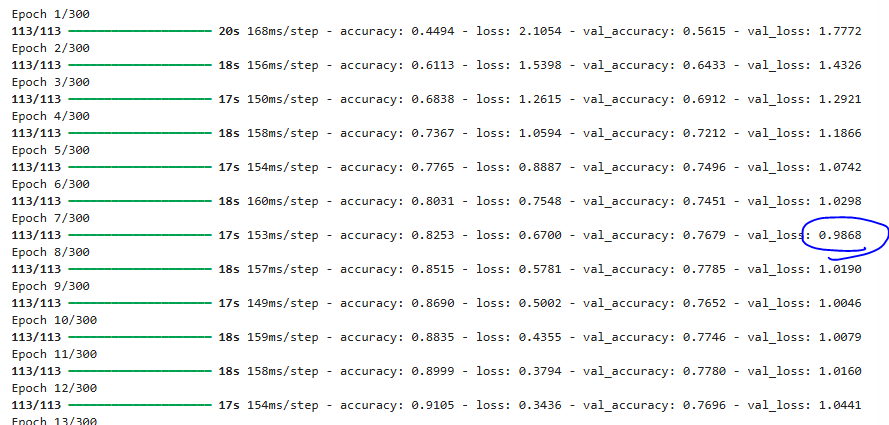

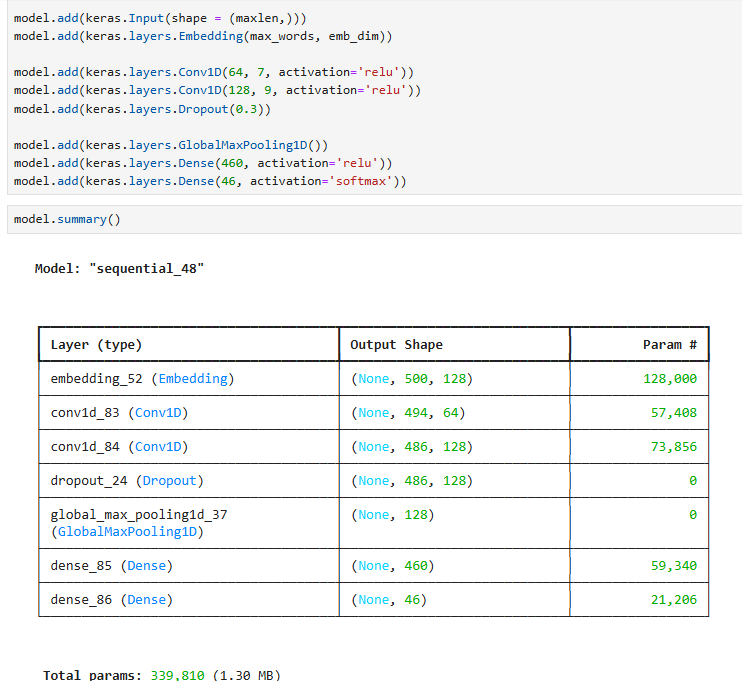

## 그 다음껀 도장 크기 9 , 11 로 변경함 + 과대적합 방지 

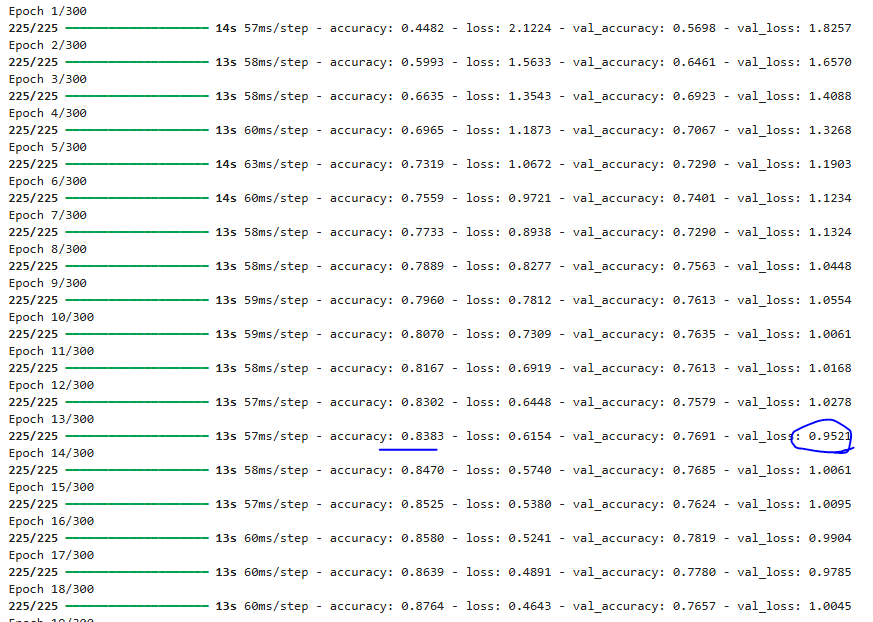